# Machine Learning Project Notebook

Introduction:

Input: Fundamentals of S&P 500 stocks

Output: whether it beats the market return(1) or not (0)

This is a classification problem.

## Import Libraries

In [224]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

## Data Exploring

#### *read the csv file and get a sense of the data*
#### *we have 49 features altogether and 1 column of y variable*

In [156]:
def readCSV():
    raw_data = pd.read_csv('keystats_with_lable.csv')
    return raw_data
raw_data = readCSV()
raw_data.head()

,Date,Unix,Ticker,Price,stock_p_change,SP500,SP500_p_change,Market Cap,Enterprise Value,Trailing P/E,...,Shares Outstanding,Float,% Held by Insiders,% Held by Institutions,Shares Short (as of,Short Ratio,Short % of Float,Shares Short (prior month,Unnamed: 48,Label
0,1/30/04 19:01,1075460462,a,22.984629,-41.37,84.478371,5.46,1.745000e+10,1.652000e+10,NaN,...,476150000.0,428500000.0,10.01,63.03,9300000.0,3.923,2.17,6930000.0,NaN,Yes
1,4/13/04 4:07,1081800431,a,19.336773,-32.89,84.572807,5.64,1.532000e+10,1.477000e+10,NaN,...,480750000.0,432700000.0,10.00,66.79,7520000.0,2.328,1.74,9170000.0,NaN,Yes
2,12/13/04 21:37,1102945054,a,14.865800,50.92,90.894150,7.57,1.161000e+10,1.037000e+10,33.58,...,487000000.0,389600000.0,20.00,66.68,6930000.0,2.638,1.78,6540000.0,NaN,Yes
3,1/22/05 5:17,1106342239,a,13.593730,57.11,88.599785,9.77,1.071000e+10,9.760000e+09,30.70,...,491070000.0,441400000.0,10.12,67.08,7040000.0,2.385,1.60,6930000.0,NaN,Yes
4,1/9/06 2:35,1136745316,a,21.544186,4.47,99.419518,11.58,1.712000e+10,1.487000e+10,52.82,...,494180000.0,NaN,0.57,70.40,10980000.0,2.300,2.20,5840000.0,NaN,Yes


In [157]:
raw_data.shape
#We have 4561 rows of data altogether

(4561, 50)

## Chose features in the data

In [158]:
columns_names = list(raw_data)
columns_names

['Date',
 'Unix',
 'Ticker',
 'Price',
 'stock_p_change',
 'SP500',
 'SP500_p_change',
 'Market Cap',
 'Enterprise Value',
 'Trailing P/E',
 'Forward P/E',
 'PEG Ratio',
 'Price/Sales',
 'Price/Book',
 'Enterprise Value/Revenue',
 'Enterprise Value/EBITDA',
 'Profit Margin',
 'Operating Margin',
 'Return on Assets',
 'Return on Equity',
 'Revenue',
 'Revenue Per Share',
 'Qtrly Revenue Growth',
 'Gross Profit',
 'EBITDA',
 'Net Income Avl to Common',
 'Diluted EPS',
 'Qtrly Earnings Growth',
 'Total Cash',
 'Total Cash Per Share',
 'Total Debt',
 'Total Debt/Equity',
 'Current Ratio',
 'Book Value Per Share',
 'Operating Cash Flow',
 'Levered Free Cash Flow',
 'Beta',
 '50-Day Moving Average',
 '200-Day Moving Average',
 'Avg Vol (3 month)',
 'Shares Outstanding',
 'Float',
 '% Held by Insiders',
 '% Held by Institutions',
 'Shares Short (as of',
 'Short Ratio',
 'Short % of Float',
 'Shares Short (prior month',
 'Unnamed: 48',
 'Label']

#### From our prior knowledge, delete some of the features that have no correlation with the stock return. 
#### For instance, date, ticker and Unix. 

In [159]:
def chose_features():
    features = [
 'Trailing P/E',
 'Forward P/E',
 'PEG Ratio',
 'Price/Sales',
 'Price/Book',
 'Enterprise Value/Revenue',
 'Enterprise Value/EBITDA',
 'Profit Margin',
 'Operating Margin',
 'Return on Assets',
 'Return on Equity',
 'Revenue Per Share',
 'Qtrly Revenue Growth', 'EBITDA',
 'Net Income Avl to Common',
 'Diluted EPS',
 'Qtrly Earnings Growth',
 'Total Cash',
 'Total Cash Per Share',
 'Total Debt',
 'Total Debt/Equity',
 'Current Ratio',
 'Book Value Per Share',
 'Operating Cash Flow',
 'Levered Free Cash Flow',
 'Beta',
 '50-Day Moving Average',
 '200-Day Moving Average',
 'Avg Vol (3 month)',
 'Shares Outstanding',
 '% Held by Insiders',
 '% Held by Institutions',
 'Shares Short (as of',
 'Short Ratio',
 'Short % of Float','Label']
    selected_columns_data = raw_data[features]
    return features,selected_columns_data
features,selected_columns_data = chose_features()
selected_columns_data.shape
#now 36 features remain including the label.

(4561, 36)

## Label 1 and 0

In [225]:
#drop the missing data and change the label from Yes/No strings to 0/1 numbers
df = selected_columns_data.dropna()
df['Label'] = df['Label'].map({'Yes': 1, 'No': 0})
#print(df.head())
print(df.shape)

(1808, 36)


## Plots

### Scatter plot for each feature

We get a rough idea about how the data are distributed with respect to each feature. 

we need to further remove some of the outliers, such as those with Trailing P/E larger than 150, Forward P/E larger than 100,
PEG Ratio larger than 500 and so on. We will count how many outliers are deleted to make sure it will not impact our dataset 
too much

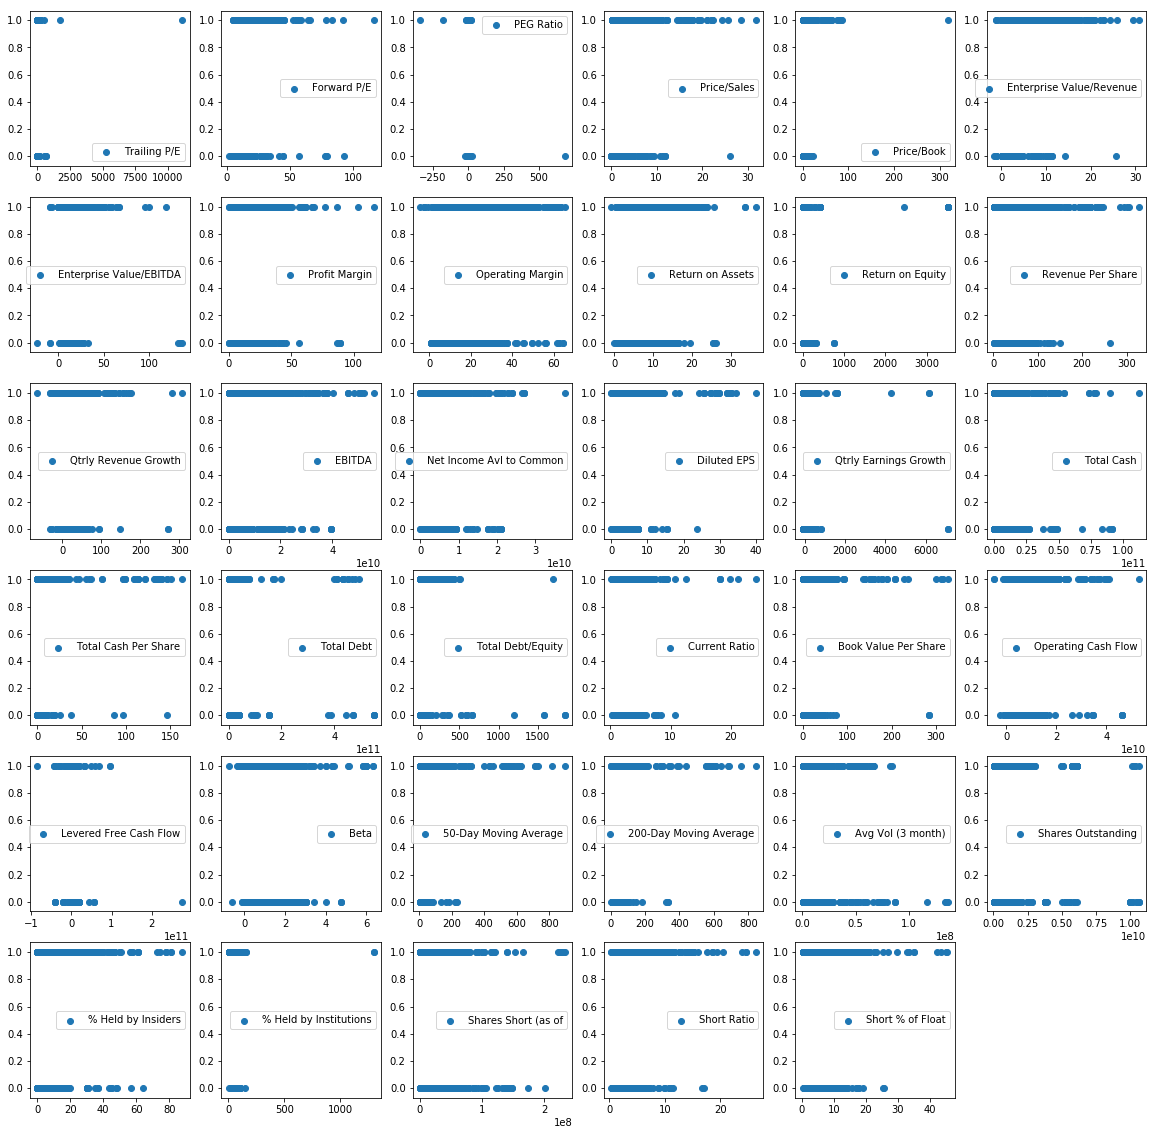

In [74]:
def scatter_plot(df):
    plt.figure(figsize=(20,20))
    for i in range(len(features)-1):
        plt.subplot(6,6,i+1)
        plt.scatter(df[features[i]],df['Label'],label = features[i])
        plt.legend()
scatter_plot(df)

## Drop Outliners

### remove those outliers that deviate from the mean too much

In [226]:
outlier_idx = np.where(df['Trailing P/E'].values > 1000)[0]
df.drop(df.index[outlier_idx],inplace=True)

outlier_idx = np.where(df['PEG Ratio'].values > 500)[0]
df.drop(df.index[outlier_idx],inplace=True)

outlier_idx = np.where(df['PEG Ratio'].values < -100)[0]
df.drop(df.index[outlier_idx],inplace=True)

outlier_idx = np.where(df['Price/Book'].values > 300)[0]
df.drop(df.index[outlier_idx],inplace=True)

outlier_idx = np.where(df['Enterprise Value/EBITDA'].values > 100)[0]
df.drop(df.index[outlier_idx],inplace=True)

outlier_idx = np.where(df['Return on Equity'].values > 2000)[0]
df.drop(df.index[outlier_idx],inplace=True)

outlier_idx = np.where(df['Qtrly Earnings Growth'].values > 4000)[0]
df.drop(df.index[outlier_idx],inplace=True)

outlier_idx = np.where(df['Total Debt/Equity'].values > 1000)[0]
df.drop(df.index[outlier_idx],inplace=True)

outlier_idx = np.where(df['Total Debt/Equity'].values > 1000)[0]
df.drop(df.index[outlier_idx],inplace=True)

outlier_idx = np.where(df['% Held by Institutions'].values > 1000)[0]
df.drop(df.index[outlier_idx],inplace=True)

df.shape
#in total, the data decrease from 1808 to 1774, thus 34 outleirs are removed, which is less 2%. 

(1774, 36)

In [76]:
df.head()

,Trailing P/E,Forward P/E,PEG Ratio,Price/Sales,Price/Book,Enterprise Value/Revenue,Enterprise Value/EBITDA,Profit Margin,Operating Margin,Return on Assets,...,50-Day Moving Average,200-Day Moving Average,Avg Vol (3 month),Shares Outstanding,% Held by Insiders,% Held by Institutions,Shares Short (as of,Short Ratio,Short % of Float,Label
5,5.08,17.30,1.26,2.53,3.37,2.33,7.549,56.50,9.38,12.15,...,35.3500,35.7200,2766800.0,425820000.0,5.99,74.8,6920000.0,3.4,1.6,0
6,4.63,17.01,1.21,2.54,3.38,2.18,17.215,56.57,8.99,4.54,...,29.2700,34.2000,3040930.0,425820000.0,6.24,72.7,7350000.0,2.5,1.8,1
7,4.33,15.11,1.13,2.68,3.67,2.53,7.322,66.50,11.12,13.70,...,33.0118,32.5942,2657080.0,407110000.0,8.76,67.6,5910000.0,2.8,1.5,1
8,4.62,16.10,1.13,2.77,3.87,2.51,7.275,66.50,11.12,13.70,...,32.7300,33.2600,2840540.0,403650000.0,6.26,72.0,5910000.0,2.8,1.5,1
9,20.47,13.07,1.04,2.25,3.76,2.30,15.421,11.77,11.38,5.17,...,36.3300,36.7500,2459290.0,371470000.0,1.49,73.8,3640000.0,1.9,1.0,1


### Distribution Plots for each feature

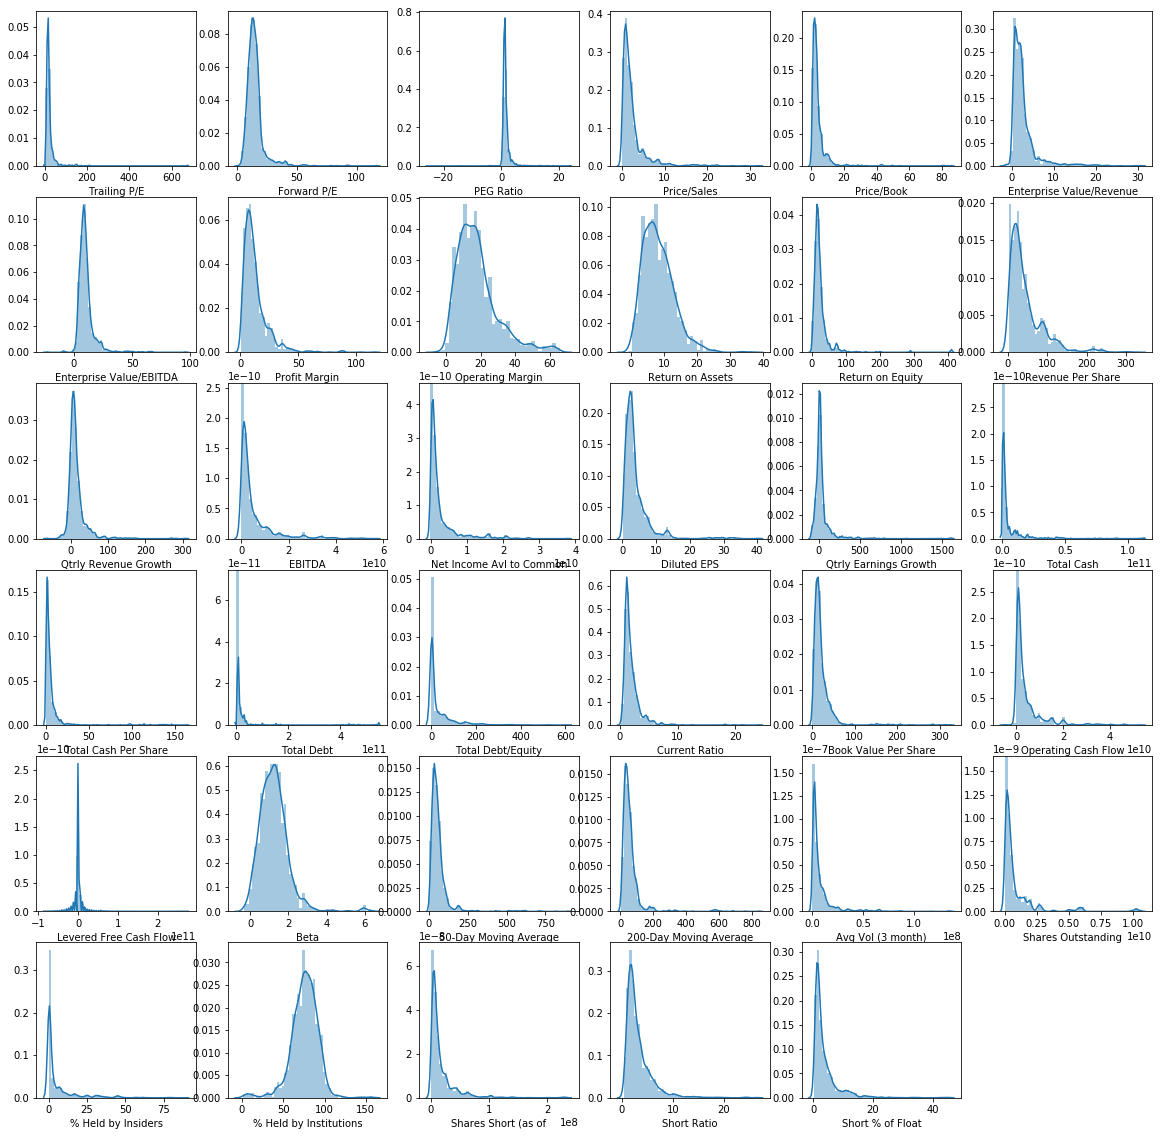

In [227]:
def dis_plot(df, features):
    plt.figure(figsize=(20,20))
    for i in range(len(features)-1):
        plt.subplot(6,6,i+1)
        x = df[features[i]]
        sns.distplot(x)
dis_plot(df,features)

### Some features' distribution are highly skewed, it is a common practice to apply a logarithmic transformation on these features to improve the performance of our classification algorithms.

We transfer the overly skewed features by taking the natural log.

### Sepcify the features that need to be transformed.

In [163]:
#some of the distribution is too skewed
skewed = [
 'Profit Margin',
 'Revenue Per Share',
 'EBITDA',
 'Diluted EPS',
 'Total Cash',
 'Total Cash Per Share',
 'Total Debt',
 'Total Debt/Equity',
 'Current Ratio',
 'Book Value Per Share',
 '50-Day Moving Average',
 '200-Day Moving Average',
 'Avg Vol (3 month)',
 'Shares Outstanding',
 '% Held by Insiders',
 '% Held by Institutions',
 'Shares Short (as of',
 'Short Ratio',
 'Short % of Float']
# skewed = ['Trailing P/E','Forward P/E',]

In [164]:
for feature in skewed:
    print('{}:{}'.format(feature,sum(n < 0 for n in df[feature])))

Profit Margin:0
Revenue Per Share:0
EBITDA:0
Diluted EPS:0
Total Cash:0
Total Cash Per Share:0
Total Debt:0
Total Debt/Equity:0
Current Ratio:0
Book Value Per Share:0
50-Day Moving Average:0
200-Day Moving Average:0
Avg Vol (3 month):0
Shares Outstanding:0
% Held by Insiders:0
% Held by Institutions:0
Shares Short (as of:0
Short Ratio:0
Short % of Float:0


In [165]:
def log_features(df,skewed):
    log_df = df.copy(deep = True)
    log_df[skewed] = log_df[skewed].apply(lambda x: np.log(x + 1))
#     df.replace([np.inf, -np.inf], np.nan)
#     log_df = log_df.dropna()
    return log_df
log_df = log_features(df,skewed)
log_df.shape
log_df.head()

,Trailing P/E,Forward P/E,PEG Ratio,Price/Sales,Price/Book,Enterprise Value/Revenue,Enterprise Value/EBITDA,Profit Margin,Operating Margin,Return on Assets,...,50-Day Moving Average,200-Day Moving Average,Avg Vol (3 month),Shares Outstanding,% Held by Insiders,% Held by Institutions,Shares Short (as of,Short Ratio,Short % of Float,Label
5,5.08,17.30,1.26,2.53,3.37,2.33,7.549,4.051785,9.38,12.15,...,3.593194,3.603322,14.833202,19.869527,1.944481,4.328098,15.749926,1.481605,0.955511,0
6,4.63,17.01,1.21,2.54,3.38,2.18,17.215,4.053002,8.99,4.54,...,3.410157,3.561046,14.927674,19.869527,1.979621,4.300003,15.810211,1.252763,1.029619,1
7,4.33,15.11,1.13,2.68,3.67,2.53,7.322,4.212128,11.12,13.70,...,3.526708,3.514353,14.792739,19.824594,2.278292,4.228293,15.592157,1.335001,0.916291,1
8,4.62,16.10,1.13,2.77,3.87,2.51,7.275,4.212128,11.12,13.70,...,3.518388,3.533978,14.859505,19.816059,1.982380,4.290459,15.592157,1.335001,0.916291,1
9,20.47,13.07,1.04,2.25,3.76,2.30,15.421,2.547099,11.38,5.17,...,3.619797,3.630985,14.715384,19.732979,0.912283,4.314818,15.107495,1.064711,0.693147,1


*Plot the distribution after log transformed*

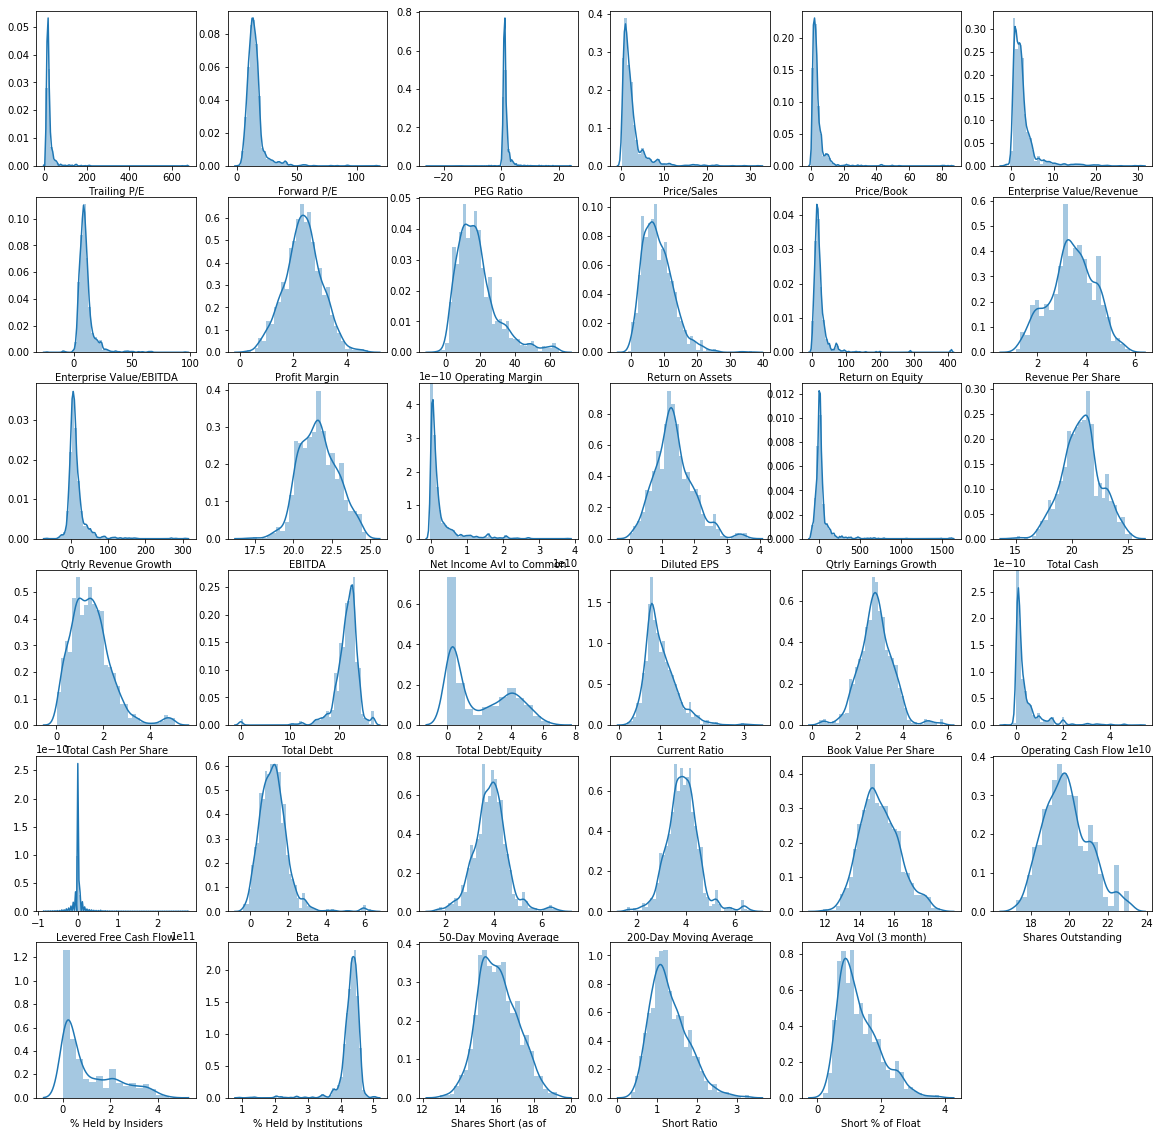

In [228]:
dis_plot(log_df,features)

#### It looks much better, isn't it? Many of the feature distributions are close enough to be treated as normal distribution now. 

### Define X and Y matrix

In [167]:
# Original Version Of X
X = np.matrix(df[features[0:-1]].values)
# Our preprocessed (logged) version of X
logX = np.matrix(log_df[features[0:-1]].values)
# we choose to use the log version of X
# X = logX
Y = np.array(df['Label'])

### Train Test Split

In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

### Define the problem:
Classification (whether it beats S&P 500 or not)
Precision: out of the stocks we predict as good, how many are actually beating the market?
Recall: out of the stocks that actually beat the market, how many do we correctly identify them as good?
We care more about high precision in a market like China because we cannot short sell a stock. 
Furthermore, avoiding investing in a stock that cannot beat the market is much more important than failing to capture a bull stock. 
Therefore, precision means a lot to us, while relatively recall does not matter that much. 

### Naive Baseline

*Our baseline is set to be a very naive classifier, where it classifies all of the stocks as beating the market (label = 1)
TP stands for true positive, which is just the number of data points with label = 1
FP stands for false positive, which is the number of data points with label = 0
TN stands for true positive while FN stands for false negative. According to our naive classifier, we give no
negative predictions. So they are all 0.*

In [169]:
def naive_baseline(df):
    TP = np.sum(Y)
    FP = len(Y) - TP
    TN = 0
    FN = 0
    accuracy = TP/(TP+FP)
    precision = (TP+TN)/(TP+FP+TN+FN)
    return accuracy,precision
accuracy,precision  = naive_baseline(df)
print("Naive Predictor: [Accuracy score: {:.4f}, Precision: {:.4f}]".format(accuracy, precision))

Naive Predictor: [Accuracy score: 0.8371, Precision: 0.8371]


Now the Precision: 0.8371 is our baseline. We should try hard to beat it.

## Data Report

In [170]:
def data_report(df):
    print("Data overview")
    print('----------------------------------------------------------------------------')
    no_good_df = df.loc[df['Label'] == 0]
    good_df = df.loc[df['Label'] == 1]
    print("Number of outperformered stocks: {}".format(len(good_df)))
    print("Number of underperformered stocks: {}".format(len(no_good_df)))
    print("Total number of data points: {}".format(len(df)))
    print("Percentage of outperformer stocks: {:2f}".format(len(good_df)/len(df)))
    print('----------------------------------------------------------------------------')
    print("Train Sample Size: {}".format(len(X_train)))
    print("Test Sample Size: {}".format(len(X_test)))
    print('----------------------------------------------------------------------------')
    print('We assume all the stock can beat the market. We will get an accuracy and precision score. Set that as our baseline.')
    print('Baseline Accuracy: {:.4f}'.format(accuracy))
    print('Baseline Precision: {:.4f}'.format(precision))
data_report(df)

Data overview
----------------------------------------------------------------------------
Number of outperformered stocks: 1485
Number of underperformered stocks: 289
Total number of data points: 1774
Percentage of outperformer stocks: 0.837091
----------------------------------------------------------------------------
Train Sample Size: 1419
Test Sample Size: 355
----------------------------------------------------------------------------
We assume all the stock can beat the market. We will get an accuracy and precision score. Set that as our baseline.
Baseline Accuracy: 0.8371
Baseline Precision: 0.8371


## Data Normalization
We use the minmax scaler here.

In [171]:
def minmax(X_train,X_test):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train,X_test
X_train,X_test = minmax(X_train,X_test)

## Pipeline For Classification

Set the random seed to control the randomness of the result for debugging purposes.

Build the cross-validation set with the number of folds k = 5.

Choose three classification models (Random Forest, Naive Bayes, Support Vector Machine) as our first step.

In [172]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
import random
random.seed(18)

In [173]:
def train_predict(learner, X_train, y_train):
    results = {}
    start = time()
    scores = cross_val_score(learner, X_train, y_train, cv=10, scoring='precision')
    end = time()
    results['train_test_time'] = end - start
    results['average_precision'] = scores.mean()
    return results

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
learners = [RandomForestClassifier(),GaussianNB(),SVC()]

In [175]:
def classification_result(learners):
    results = {}
    for clf in learners:
        clf_name = clf.__class__.__name__
        results[clf_name] = (train_predict(clf, X_train, Y_train))
    return results
results = classification_result(learners)

# Classification Result

## *Our main criteria to evaluate the results:*
### -  total training and testing time
### -  average precision of the 5 folds 

In [176]:
for k,v in results.items():
    print('{} train test time: {}'.format(k,v['train_test_time']))
    print('{} average precision: {}'.format(k,v['average_precision']))
    print('----------------------------------------------------------')

RandomForestClassifier train test time: 0.42566394805908203
RandomForestClassifier average precision: 0.9200173964758795
----------------------------------------------------------
GaussianNB train test time: 0.021625041961669922
GaussianNB average precision: 0.8808381388539168
----------------------------------------------------------
SVC train test time: 0.46144986152648926
SVC average precision: 0.8344054407284853
----------------------------------------------------------


# Results Visualization

## Plot Learning Curves

In [177]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

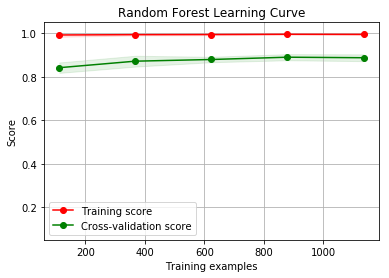

In [183]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(learners[0], 'Random Forest Learning Curve', X_train, Y_train, ylim=(0.05, 1.05), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

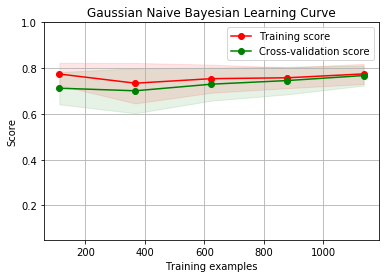

In [185]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(learners[1], 'Gaussian Naive Bayesian Learning Curve', X_train, Y_train, ylim=(0.05, 1.0), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

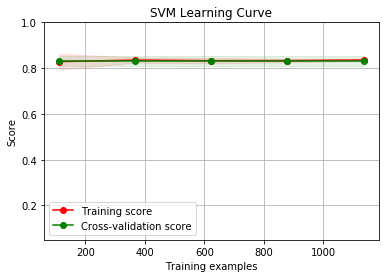

In [186]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(learners[2], 'SVM Learning Curve', X_train, Y_train, ylim=(0.05, 1.0), cv=cv, n_jobs=4)

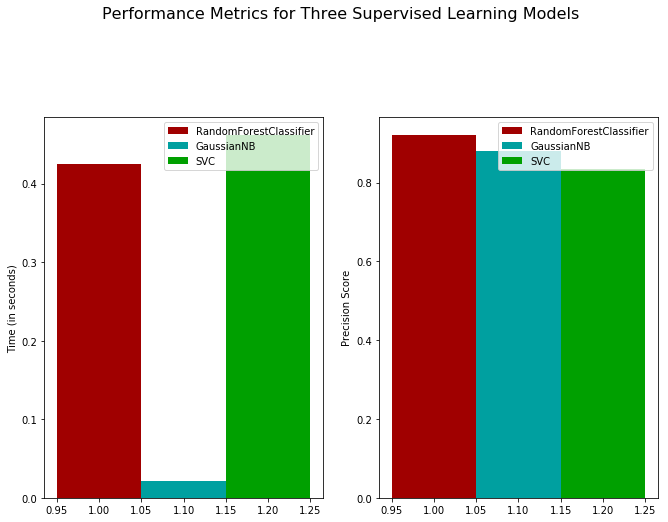

In [187]:
def vis(results):
    fig, ax = plt.subplots(1,2, figsize = (11,7))
    n_groups = 1
    ind = 1
    bar_width = 0.1
    colors = ['#A00000','#00A0A0','#00A000']    
    ax[0].set_ylabel("Time (in seconds)")
    ax[1].set_ylabel("Precision Score")
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
# 
    
    p1 = ax[0].bar(ind,results['RandomForestClassifier']['train_test_time'],bar_width,color = '#A00000',bottom = 0)
    p2 = ax[0].bar(ind+bar_width,results['GaussianNB']['train_test_time'],bar_width,color = '#00A0A0',bottom = 0)
    p3 = ax[0].bar(ind+2*bar_width,results['SVC']['train_test_time'],bar_width,color = '#00A000',bottom = 0)    
    ax[0].legend((p1,p2,p3),('RandomForestClassifier','GaussianNB','SVC'))
# 
    p1 = ax[1].bar(ind,results['RandomForestClassifier']['average_precision'],bar_width,color = '#A00000',bottom = 0)
    p2 = ax[1].bar(ind+bar_width,results['GaussianNB']['average_precision'],bar_width,color = '#00A0A0',bottom = 0)
    p3 = ax[1].bar(ind+2*bar_width,results['SVC']['average_precision'],bar_width,color = '#00A000',bottom = 0)    
    ax[1].legend((p1,p2,p3),('RandomForestClassifier','GaussianNB','SVC'))

    plt.show() 
    
vis(results)

All of our models have beaten the baseline. Based on the visualization above, we decide to choose Random Forest because
1) Although the Naive Bayes Classifier is faster, the time difference is tiny (0.6 and 0.2 seconds respectively).
2) The precision of Random Forest is better by 1%, which is very important to us since this might bring us 10% more profit in investment
3) Random Forest has more parameters to tune, giving us more opportunity to raise the performance. 

# Tune the parameter of our Random Forest Classifier

### Make predictions using the unoptimized model

In [230]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

clf = RandomForestClassifier(random_state=10)
scorer = make_scorer(precision_score)

from sklearn.model_selection import RandomizedSearchCV
min_samples_split = [x for x in range(2,101)]


random_grid = {
               'min_samples_split': min_samples_split,
               }
grid_obj = GridSearchCV(clf, random_grid, scoring=scorer)
grid_fit = grid_obj.fit(X_train, Y_train)
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized model
predictions = (clf.fit(X_train, Y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)


### Report the before-and-afterscores

In [231]:
print("Unoptimized model\n------")
print("Precision score on testing data: {:.4f}".format(precision_score(Y_test, predictions)))
print("\nOptimized Model\n------")
print("Final precision score on the testing data: {:.4f}".format(precision_score(Y_test, best_predictions)))

Unoptimized model
------
Precision score on testing data: 0.9286

Optimized Model
------
Final precision score on the testing data: 0.9353


#### Relationship between min_samples_split and average precision score

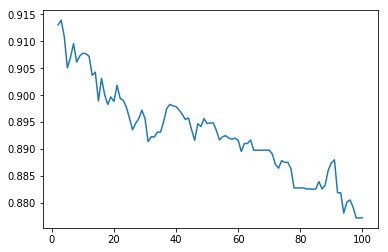

In [223]:
# print(grid_obj.grid_scores_)
scores = [x[1] for x in grid_obj.grid_scores_]
# print(scores)
fig = plt.figure()
ax = plt.axes()
ax.plot(min_samples_split, scores);

When the min_samples_split increases, our score goes down a bit. 

But it actually generalizes better, since when n is very small, it is easy to incur an overfitting error. 

## Random Grid Search (parameter tuning continued)

In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

clf = RandomForestClassifier()
scorer = make_scorer(precision_score)

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
# 1,3,5
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node 2 no, 
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node , no
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#print(random_grid)
grid_obj = RandomizedSearchCV(clf, random_grid, scoring=scorer)
grid_fit = grid_obj.fit(X_train, Y_train)
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, Y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print(grid_obj.grid_scores_)

print(best_clf)
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Precision score on testing data: {:.4f}".format(precision_score(Y_test, predictions)))
#print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final precision score on the testing data: {:.4f}".format(precision_score(Y_test, best_predictions)))
#print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Here is what we have:

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Unoptimized model
------
Precision score on testing data: 0.9027

Optimized Model
------
Final precision score on the testing data: 0.9138

As we can see, the n_estimators, min_samples_leaf hit the right boundary. So we must expand our grid.

In [1]:
n_estimators = [int(x) for x in np.linspace(start = 2000, stop = 4000, num = 10)]
max_features = ['auto']
max_depth = [int(x) for x in np.linspace(20, 40, num = 10)]
min_samples_split = [3,4,5,6,7,8]
min_samples_leaf = [4, 5, 6, 7 ,8]
bootstrap = [False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
grid_obj = RandomizedSearchCV(clf, random_grid, scoring=scorer)
grid_fit = grid_obj.fit(X_train, Y_train)
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, Y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print(best_clf)
# Grid Score
print(grid_obj.grid_scores_)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Precision score on testing data: {:.4f}".format(precision_score(Y_test, predictions)))
print("\nOptimized Model\n------")
print("Final precision score on the testing data: {:.4f}".format(precision_score(Y_test, best_predictions)))

NameError: name 'np' is not defined

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=24, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Unoptimized model
------
Precision score on testing data: 0.9027

Optimized Model
------
Final precision score on the testing data: 0.9136



In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 1800, stop = 2100, num = 30)]
max_features = ['auto']
max_depth = [24]
min_samples_split = [5]
min_samples_leaf = [5]
bootstrap = [False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
grid_obj = RandomizedSearchCV(clf, random_grid, scoring=scorer)
grid_fit = grid_obj.fit(X_train, Y_train)
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, Y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print(best_clf)
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Precision score on testing data: {:.4f}".format(precision_score(Y_test, predictions)))
print("\nOptimized Model\n------")
print("Final precision score on the testing data: {:.4f}".format(precision_score(Y_test, best_predictions)))

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=24, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=1882, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
            
Unoptimized model
------
Precision score on testing data: 0.9027

Optimized Model
------
Final precision score on the testing data: 0.9193

#### By tuning the model and giving the best estimator, we increase our precision by 1.7%. 

## Feature Extraction

- Different features provide different predictive power. 
- Reduce the feature spaces could help the program improve its performance especially when the size of the dataset is   very limited. It also might help prevent overfitting.
- 'feature importances' in sklearn can rank the importance of each feature.

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)
importances = model.feature_importances_ 
len(importances)
len(features)

36

In [93]:
dic = {}
for i in range(len(importances)):
    dic[importances[i]] = features[i]
#     dic[features[i]] = importances[i]
# dic.items()
keys = list(dic.keys())
keys.sort(reverse=True)
keys[:5]
columns = []
for k in keys[:5]:
    columns.append(dic[k])
columns

['50-Day Moving Average',
 'Trailing P/E',
 'Forward P/E',
 '200-Day Moving Average',
 'Enterprise Value/Revenue']

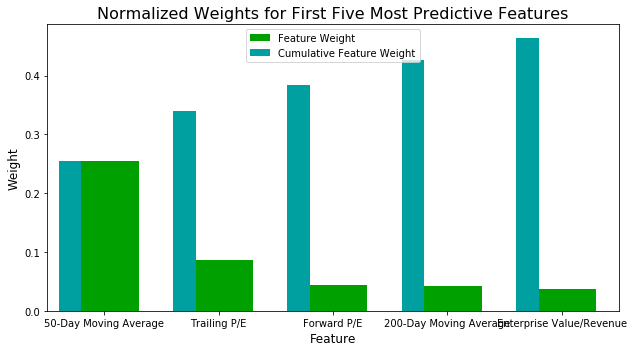

In [95]:
def feature_plot(importances, X_train, y_train,columns):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
#     columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  
feature_plot(importances,X_train,Y_train,columns)

## Feature Selection

### Now we ranked the top five features that provide the most predictive power, we are going to train only with these five features so that the dataset can be learned with fewer features.

In [96]:
best_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [128]:
X = np.matrix(df[features])
X_reduced = np.matrix(df[columns])
Y = np.array(df['Label'])
X.shape

(1774, 36)

In [146]:
X_reduced = log_df[['50-Day Moving Average',
 'Trailing P/E',
 'Forward P/E',
 '200-Day Moving Average',
 'Enterprise Value/Revenue']]
X_reduced = np.matrix(X_reduced.values)

In [147]:
X_train_reduced,X_test_reduced,Y_train_reduced,Y_test_reduced = train_test_split(X_reduced,Y,test_size = 0.2, random_state = 0)

In [229]:
# result = train_predict(best_clf, X_train_reduced, Y_train_reduced)
best_clf.fit(X_train_reduced,Y_train_reduced)
reduced_predictions = best_clf.predict(X_test_reduced)
print("Precision on testing data: {:.4f}".format(precision_score(Y_test, reduced_predictions)))

Precision on testing data: 0.9263


#### The precision increases again by around 1%. Future work will be conducted on finding the most suitable number of features.